# CRYSTALpy.plot tutorial

## Band

As for all the crystal the crystal_function at first they need to be imported following the same logic:

```console
from CRYSTALpy.module_name import function_name
```

In the case of the plotting functions we will need both the file_readwite and the plot modules, to generate the band object from the properties output and plot it:

In [1]:
from CRYSTALpy.crystal_io import Properties_output
import CRYSTALpy.plot as cfplt

### Generation of a Band plot

In the first exercise we will see how to create a simple band plot starting from a properties output. We will see at a later stage how to generate more complex band plots that allow you to compare band structures obtained with different parameters.

The first step for the creation of a Band plot is to generate a Band object from your properties output with the read_band() method contained in the crystal_io module. 

In [2]:
band=Properties_output().read_cry_bands('../examples/data/hTaAs_lda_bande44.BAND')

Now that we have the Band we can plot the structure as follows:

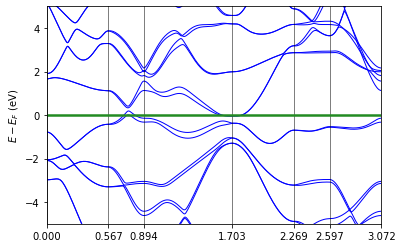

In [3]:
cfplt.plot_cry_bands(band, energy_range=[-5,5])

Where band is the object that we plot and the energy range that defines the minimum and maximum energy of the range that you want to report in the plot.

Now the plot that we have here is pretty basic, but it is possible to use other arguments of the plot_cry_bands() to customize the plot. Looking at the plot above we can see that we lack the labels for the high symmetry point along the path, this issue can be solved using the k_labels arg of the method. 

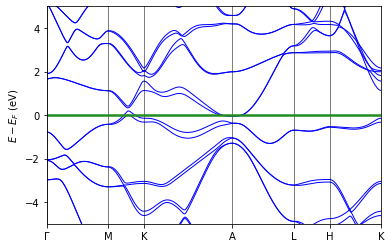

In [4]:
cfplt.plot_cry_bands(band, energy_range=[-5, 5], k_labels=['Gamma', 'M', 'K', 'A', 'L', 'H', 'K'])

You can further customize the plot by defining a title, changing the bands color or fermi level color with the **kwargs title, color and fermi respectively.

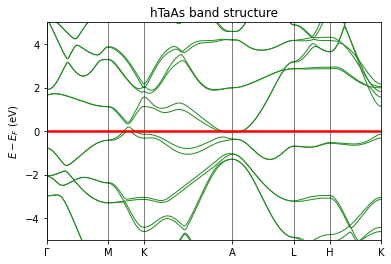

In [5]:
cfplt.plot_cry_bands(band, energy_range=[-5,5], k_labels=['Gamma', 'M', 'K', 'A', 'L', 'H', 'K'], title='hTaAs band structure', color='forestgreen', fermi='red')

There are even more **kwargs that you could use to customize your band structure, and you can find some example <a href="https://github.com/crystal-code-tools/CRYSTALpy/blob/main/examples/plot.ipynb">here</a>.

Now that you have seen how to plot a band structure you can try with your own data below:

In [6]:
# Try here with your own data

### Generation of a multiple band plot

By default the .plot_cry_band() method will plot a single band structure, but you can also plot multiple band structures overlapped with one another, or in a series of sublots. To do so we have to use the **kwarg **mode**, this will accept only the following keywords: *single*, *multi*, or *compare*. 

By default mode is setted to *single*, thus it is not necessary to use the keyword for the single band structure plot. If you are interested in a plot with multiple overlapping structure you have to use the *multi* keyword, that requires a few modification with respect to what we have seen for the single band structure.

The first thing to differ from the single band structure is the band object which now will have to be a a list of band object that could be done as follows:

In [7]:
Data = ['../examples/data/hTaAs_lda_noso_bande.band', '../examples/data/hTaAs_lda_bande44.BAND',
        '../examples/data/hTaAs_lda_P15_bande.band', '../examples/data/hTaAs_lda_P25_bande.band']
for index, file in enumerate(Data):
    Data[index] = Properties_output().read_cry_bands(file)


Now that we have a list of band objects, we can do a first plot of the band structure with the *args and **kwargs that are unchaged by mode.

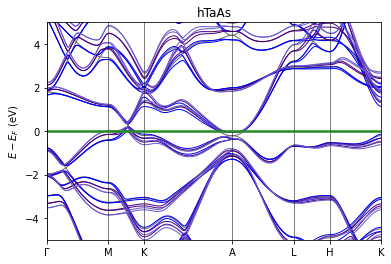

In [8]:
cfplt.plot_cry_bands(Data, mode='multi', energy_range=[-5, 5], k_labels=[
                     'Gamma', 'M', 'K', 'A', 'L', 'H', 'K'], title='hTaAs')


Now that we have obtained a plot with multiple band structures overlapped we can customize the plot using different **kwargs. You may want to change the color of the different band structure and of the fermi level. This could be done using the same **kwargs that you have used for the single structure case (*color* and *fermi*), but this time *color* will have to be a list. Furthermore, if you want to add labels to each band structure you can use the **kwargs *label*, which also needs to be a list. 

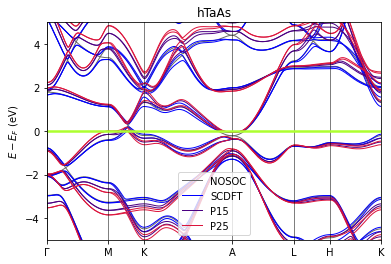

In [9]:
cfplt.plot_cry_bands(Data, mode='multi', energy_range=[-5, 5], k_labels=['Gamma', 'M', 'K', 'A', 'L', 'H', 'K'], title='hTaAs',
                     labels=['NOSOC', 'SCDFT', 'P15', 'P25'], color=['dimgrey', 'blue', 'indigo', 'crimson'], fermi='greenyellow')

Further customization of the plot can be achieved through a series of **kwargs for which example could be found <a href="https://github.com/crystal-code-tools/CRYSTALpy/blob/main/examples/plot.ipynb">in this notebook</a>.

Among the many **kwargs one that could be particularly usefull for this kind of plot is the *k_range*, which will allow to select segments of the path  between two specific High Simmetry Points (HSP). *k_range* will have to be a list of two strings, which correspond to the starting and ending HSP, if a given HSP is repeted multiple times in the plot starting from the second time the HSP is used onwards the HSP will be followed by a number starting from 1.

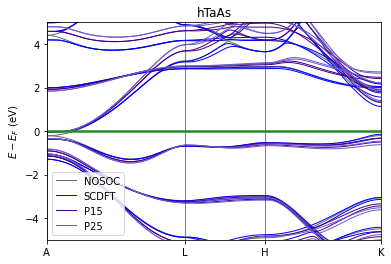

In [10]:
cfplt.plot_cry_bands(Data, mode='multi', energy_range=[-5, 5], k_labels=['Gamma', 'M', 'K', 'A', 'L', 'H', 'K'], title='hTaAs',
                     labels=['NOSOC', 'SCDFT', 'P15', 'P25'],k_range=['A', 'K1'])

Now that we have seen in detail how to obtain a multiband plot you can try with your own data in the cell below:

In [11]:
#Try with your own data

There is one last option for option for plotting multiple band structure in different subplots using the **kwargs *mode='compare'*, some example for such plotting mode could be found at the following <a href="https://github.com/crystal-code-tools/CRYSTALpy/blob/main/examples/plot.ipynb">link</a>. 

## DOSS

Another interesting feature of the electronic structure we may want to plot is the density of states. The required imports to plot such feature are the same ones that we used for the band structure, we will just change the methods used as follows:

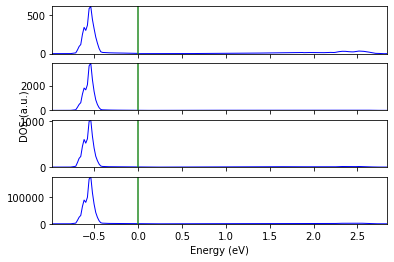

In [12]:
Data=Properties_output().read_cry_doss('../examples/data/doss_96.DOSS')
cfplt.plot_cry_doss(Data)

By default the DOSS will be plotted as subplots, one for each projection. It is possible though to plot all the different projections in one single switching the *overlap* **kwargs to the True value from it's default False state. This will require you to define a list of colors and labels under the corresponding **kwargs *color* and *labels*. As we show below.

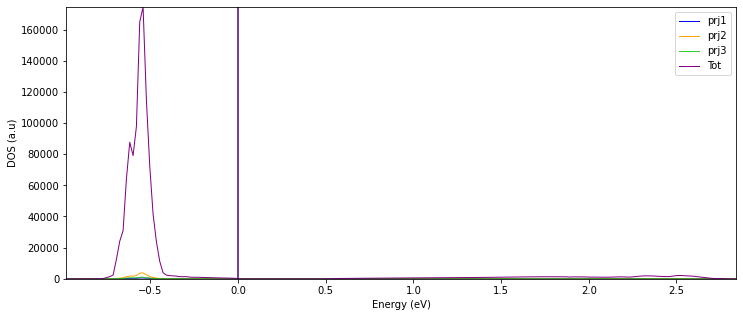

In [13]:
cfplt.plot_cry_doss(Data, overlap=True, color=['blue', 'orange', 'limegreen','purple'], fermi='indigo', labels=['prj1','prj2','prj3','Tot'])

Furthermore, it is possible for both mode to select a range of DOS to explore. This could be achieved using the *dos_range* **kwarg which has to be defined as a list of two values that correspond to the minimum and maximum values.

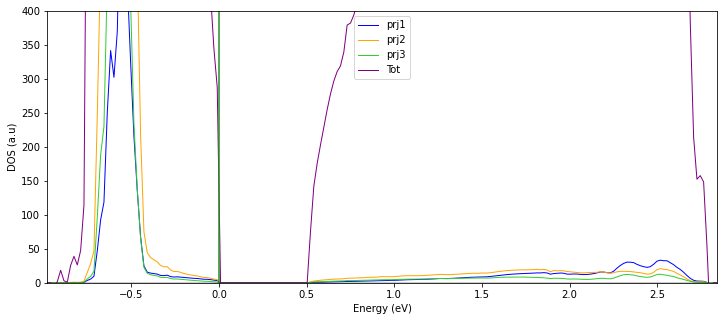

In [14]:
cfplt.plot_cry_doss(Data, overlap=True, color=['blue', 'orange', 'limegreen','purple'], fermi='forestgreen', labels=['prj1','prj2','prj3','Tot'], dos_range=[0,400])

 A further customization level can be achieved for by selecting the projections that you want to plot with the **kwarg *prj*, which is a list of numbers where 1 corresponds to the first projection.

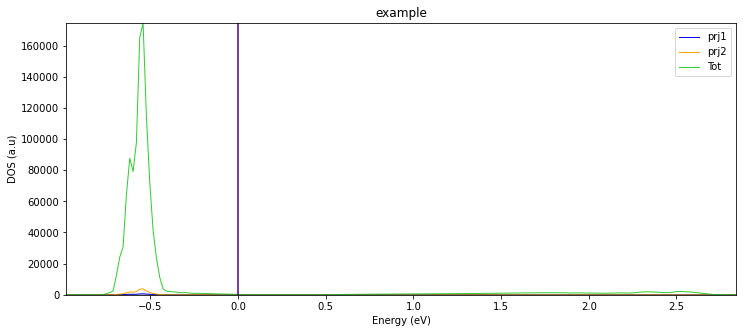

In [15]:
cfplt.plot_cry_doss(Data, title='example', color=['blue', 'orange', 'limegreen'], fermi='indigo',
                    overlap=True, labels=['prj1', 'prj2', 'Tot'], prj=[1,2,4])

Furthermore, you'll be able to restrict the energy range that you explore with the **kwarg *energy_range* that works in the same way showed in the band tutorial. 

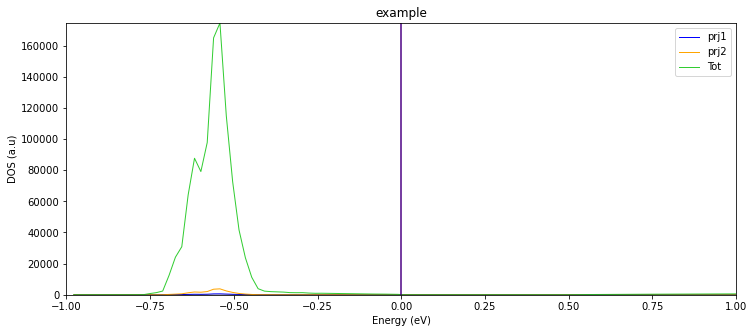

In [16]:
cfplt.plot_cry_doss(Data, title='example', energy_range=[-1, 1], color=['blue', 'orange', 'limegreen'], fermi='indigo',
                    overlap=True, labels=['prj1', 'prj2', 'Tot'], prj=[1,2,4])

More ways to customize your plots can be found  <a href="https://github.com/crystal-code-tools/CRYSTALpy/blob/main/examples/plot.ipynb">in this notebook</a>. 

Now you can play with this plotting function to plot your own data in the cell below:  

In [17]:
# Try with your own data 

## Electronic Structure

Sometimes it may be usefull to plot the band strucuture alongside the DOSS. To do so you need to import the both files with the same methods that we showed before.

In [18]:
bands=Properties_output().read_cry_bands('../examples/data/hTaAs_lda_bande44.BAND')
doss=Properties_output().read_cry_doss('../examples/data/doss_96.DOSS')

Once the data have been imported we can use the .plot_cry_es() to plot them alongside as follows


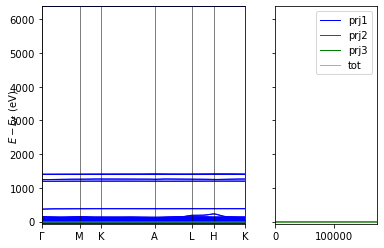

In [19]:
cfplt.plot_cry_es(bands, doss, k_labels=[
                  'Gamma', 'M', 'K', 'A', 'L', 'H', 'K'], linestl_doss=['-', '-', '-', '-'],
                  labels=['prj1', 'prj2', 'prj3', 'tot'], color_doss=['blue', 'red', 'green', 'orange'])


It is then possible to customize the plot using many of the **kwargs that we have seen before for the DOSS and band structure plotting methods, such as *energy_range* and *dos_max_range*:

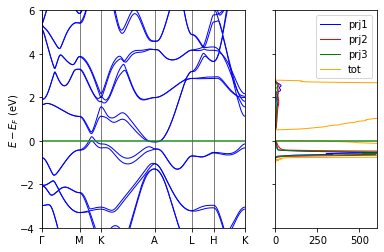

In [20]:
cfplt.plot_cry_es(bands, doss, k_labels=[
                  'Gamma', 'M', 'K', 'A', 'L', 'H', 'K'], linestl_doss=['-', '-','-','-'],
                  labels=['prj1', 'prj2', 'prj3', 'tot'], color_doss=['blue', 'red', 'green','orange'],
                  energy_range=[-4, 6], dos_max_range=600)

Furthermore, as we have seen in the doss plotting method we can select the projections that we want to plot with the **kwarg *prj*